# Parámetros

In [1]:
ECOBICI_CLIENT_ID = '2199_132ley5lk3404wkk4c4w4ggo48kwcokosogg0k0www84s08gs'
ECOBICI_CLIENT_SECRET = '61xytd2ketssok44g4kkckwogkg048gk0ok48sc0k0wgc8scs'

TWITTER_CONSUMER_KEY = 'LekadufpFPEcpu2n5arDEqfz8'
TWITTER_CONSUMER_SECRET = 'po3kkAn88rTMK8aoVG65oOLgInflEdWtTmlZEK04BUy7RfDClA'

TWITTER_ACCESS_TOKEN = '1495092461739200513-6wyjGzuLAvuBzJ4DPDOsw2MCQKV2kE'
TWITTER_ACCESS_TOKEN_SECRET = '8hmwtPNa7flSxN1QpO6mJsi3ndBBMofwWKcmfSy1EYw7o'

# Clase

In [2]:
from map import EcoBiciMap
ebm = EcoBiciMap(ECOBICI_CLIENT_ID, ECOBICI_CLIENT_SECRET, TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET, TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
print(ebm)


        02/May/2022 21:44

        Clase para extraer información de la API Ecobici (https://www.ecobici.cdmx.gob.mx/sites/default/files/pdf/manual_api_opendata_esp_final.pdf)
        transformar, graficar la disponibilidad en un mapa de calor, exportar los datos y crear un tweet con el mapa.
        


# Tokens de acceso

In [3]:
ebm.get_token(first_time=True)
ebm.ACCESS_TOKEN

'NzExODEwZmExNGQwOGFkMjkyNWRjY2MzNDI2NGQzYTI5NGZlMjAyM2VmNjlkNGJiNjQ5NDBkYTQwNDVlN2M5MA'

# Extracción

In [4]:
ebm.st = ebm.get_data()
ebm.av = ebm.get_data(availability=True)
ebm.av.head()

,id,status,availability.bikes,availability.slots
0,1,OPN,12,12
1,2,OPN,3,9
2,3,OPN,1,33
3,4,OPN,9,6
4,5,OPN,1,11


# Códigos Postales CDMX

https://datos.cdmx.gob.mx/dataset/7abff432-81a0-4956-8691-0865e2722423/resource/8ee17d1b-2d65-4f23-873e-fefc9e418977

<AxesSubplot:>

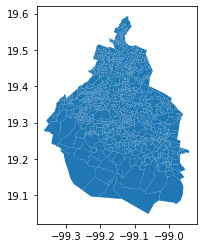

In [5]:
# ebm.get_shapefile()

from geopandas import read_file
ebm.gdf = read_file('/Users/efraflores/Desktop/hub/ecobici_bot/data/shp').to_crs(epsg=4326)
ebm.gdf.plot()

# Formato a mapa

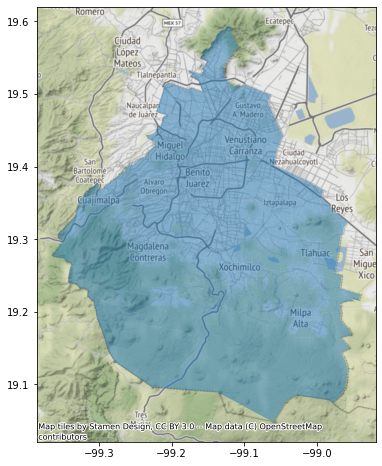

In [6]:
import contextily as cx

ax = ebm.gdf.plot(figsize=(8, 8), alpha=0.5)
cx.add_basemap(ax, crs=ebm.gdf.crs)

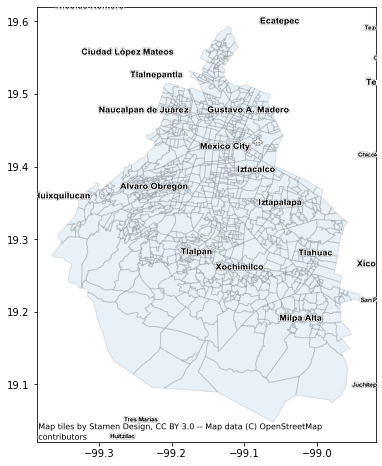

In [7]:
ax = ebm.gdf.plot(figsize=(8, 8), alpha=0.1, edgecolor='k')
cx.add_basemap(ax, crs=ebm.gdf.crs, source=cx.providers.Stamen.TonerLabels, interpolation='sinc', aspect='equal')

# Transformar

In [8]:
ebm.transform()
ebm.df.head()

,id,zipCode,location.lat,location.lon,status,availability.bikes,availability.slots,slots_proportion,bikes_proportion
0,55,06700,19.434356,-99.138064,OPN,3,12,0.800000,0.200000
1,124,06500,19.422392,-99.150358,OPN,14,20,0.588235,0.411765
2,159,06760,19.407517,-99.155373,OPN,10,26,0.722222,0.277778
3,241,11520,19.438620,-99.207580,OPN,1,23,0.958333,0.041667
4,243,11510,19.440839,-99.196712,OPN,0,15,1.000000,0.000000


# Mapa final

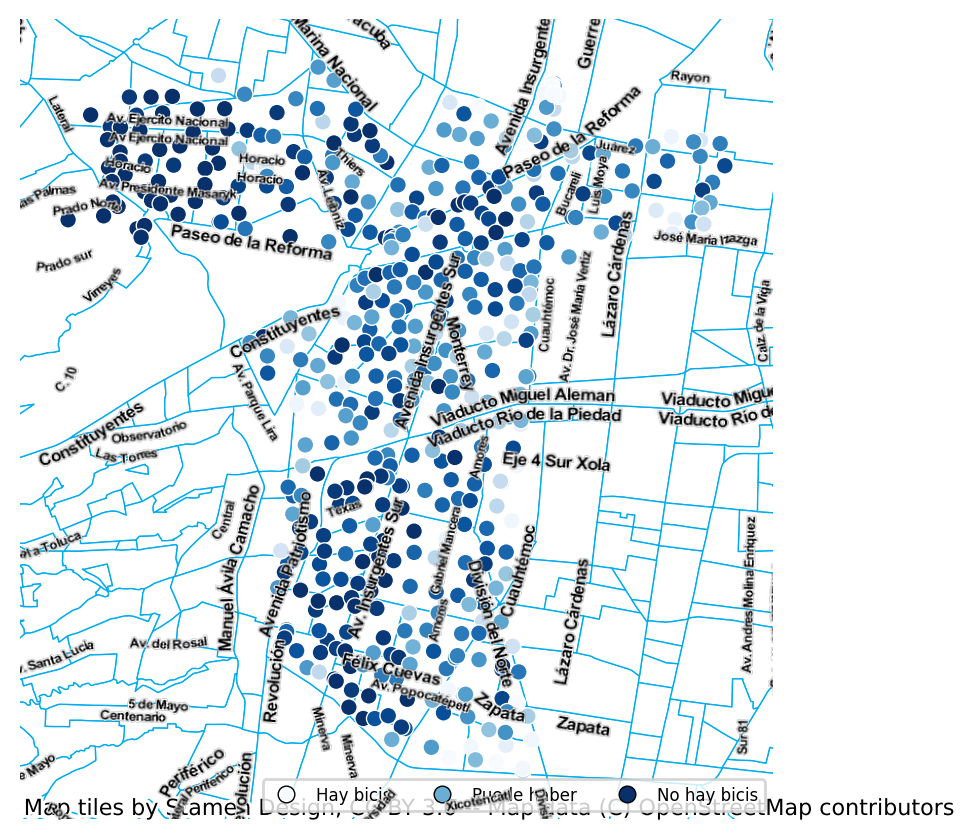

<Figure size 432x288 with 0 Axes>

In [9]:
ebm.plot_map(
    padding=0.006,
    # color='#1B1B1B',
    color='#ffffff',
    edgecolor='#00acee', 
    points_palette='Blues')
ebm.eb_map

# Guardar imagen

In [10]:
ebm.eb_map.savefig('/Users/efraflores/Desktop/hub/ecobici_bot/media/map/map.png')

# Crear tweet

In [11]:
ebm.tweet_map(img='/Users/efraflores/Desktop/hub/ecobici_bot/media/map/map.png')